# Sentiment Analysis of US Airline Tweets Using Deep Neural Network

## Introduction

### Problem Definition
Sentiment analysis, a key task in natural language processing (NLP), involves identifying and categorizing opinions expressed in a piece of text to determine the writer's sentiment—whether positive, neutral, or negative. This study focuses on analyzing the sentiment of tweets related to US airlines, aiming to classify them into these three categories. Sentiment analysis on social media data, such as tweets, presents unique challenges due to the informal language, use of slang, emojis, sarcasm, and the brevity of the messages. For instance, a tweet might convey a sentiment that is not straightforward, making it difficult for traditional methods to accurately capture the intended emotional tone.

### Motivation  
In today's digital age, social media platforms like Twitter have become crucial channels for customers to voice their opinions and experiences with companies, including airlines. Understanding customer sentiment from these platforms allows airlines to gain real-time insights into customer satisfaction and potential issues. This ability to swiftly analyze and respond to customer feedback is vital, as studies have shown that 67% of customers use social media for customer service. Effective sentiment analysis can enable airlines to proactively address problems, enhance customer satisfaction, and build stronger brand loyalty. The goal of this study is to develop a reliable and scalable method for automating sentiment analysis, tailored to the unique characteristics of social media data, which can help airlines improve their services and gain a competitive edge.

### Dataset  
The dataset used in this study is the "Twitter US Airline Sentiment" dataset from Kaggle. This dataset consists of 14,640 tweets directed at various US airlines, each labeled as positive, neutral, or negative. The distribution of sentiment labels is approximately 16% positive, 63% negative, and 21% neutral, highlighting a significant class imbalance. The tweets have already undergone basic preprocessing steps, such as the removal of duplicates and irrelevant information. The class imbalance in this dataset poses a challenge for model training, requiring careful selection of evaluation metrics and techniques to ensure that the models perform robustly across all classes.

### Constraints and Methodological Focus  
This assignment is guided by the principles outlined in *Deep Learning with Python* by François Chollet, specifically adhering to "The Universal Workflow of Machine Learning." Within this framework, we are constrained by the requirement to use only Dense layers, Dropout layers, and L1/L2 regularization techniques in our neural network models. We are restricted from using more advanced techniques such as Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), or methods like Early Stopping. Despite these constraints, our exploration will focus on various dense neural network architectures, including wider, deeper, and regularized models, to determine their effectiveness in sentiment classification. This exploration will provide insights into how different architectural choices impact model performance, particularly in handling the class imbalance present in the dataset.

### Objectives  
The primary objectives of this study are:

1. **Data Preprocessing:** To preprocess the text data, converting it into a numerical format that can be effectively utilized by machine learning models. This involves techniques like tokenization, TF-IDF vectorization, and handling class imbalance.

2. **Model Development and Exploration:** To develop and train dense neural network models for sentiment classification, exploring various network architectures. This includes experimenting with wider and deeper models, as well as applying Dropout and L1/L2 regularization techniques to understand their impact on model performance.

3. **Performance Evaluation:** To rigorously evaluate the performance of these models using a range of metrics, including accuracy, F1 Score, and AUC, with a particular focus on understanding how these models handle the class imbalance in the dataset.

4. **Model Optimization:** To investigate and implement techniques such as Dropout and L1/L2 regularization to prevent overfitting and improve the generalization of the models, given the constraints of not using CNNs, RNNs, or Early Stopping.

5. **Architectural Insights:** To analyze and compare the performance of different neural network architectures, providing insights into the strengths and limitations of each approach within the given constraints.

These objectives aim to provide a comprehensive understanding of the effectiveness of dense neural networks in handling sentiment analysis tasks, while also exploring how different architectural choices impact performance.

## Methodology

### 1. Data Loading and Preprocessing

#### Data Loading
We begin by mounting Google Drive to access the dataset stored in it. We create the necessary directories to store the dataset and use the `gdown` library to download the dataset from the given URL. This ensures that our data is easily accessible and can be seamlessly integrated into our Google Colab environment.

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

!pip -q install gdown==4.6.0
import gdown

# Detect if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = "/content/drive/MyDrive/Neural Networks/Twitter US Airline Sentiment/"
    # Create necessary directories to store the dataset
    os.makedirs(base_path, exist_ok=True)

except ImportError:
    IN_COLAB = False
    base_path = "./"

# Download the dataset from the given URL
URL = "https://drive.google.com/file/d/15XHy_PdD6Q2aa6n-pnWmSFGCv1oK9vWA/view?usp=sharing"
DOWNLOAD_FILE_PATH = "https://drive.google.com/uc?export=download&id=" + URL.split("/")[-2]
gdown.download(DOWNLOAD_FILE_PATH, base_path + "Tweets.csv", quiet=True)

'./Tweets.csv'

#### Data Preprocessing
The dataset is loaded into a pandas DataFrame. We use `sklearn`'s `TfidfVectorizer` to convert the text data into numerical form using TF-IDF mode. The sentiment labels are converted into numerical form using label encoding and then one-hot encoded. We chose 5000 features and bigrams for TF-IDF to capture a broad range of important terms and their combinations, providing a richer representation of the text data.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical

# Load the data from the CSV file into a pandas DataFrame
file_path = os.path.join(base_path, "Tweets.csv")
tweets = pd.read_csv(file_path)[['text', 'airline_sentiment']]

# Label Encoding to convert sentiment labels into numerical form
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(tweets['airline_sentiment']))

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets['text'], y, test_size=0.2, stratify=y, random_state=42)

# Define the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

### 2. Choosing a Measure of Success

#### Exploring Class Imbalance
Before proceeding with model development, it is crucial to understand the class distribution to address any potential imbalance. The class distribution plot below shows a significant imbalance, with a majority of tweets being negative (63%), followed by neutral (21%), and positive (16%). This imbalance will be taken into account when selecting evaluation metrics and techniques to ensure robust performance.

In [5]:
class_counts = tweets['airline_sentiment'].value_counts()
print(class_counts)

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


#### Metrics
Balanced Accuracy Score is useful for evaluating the model's performance on each class equally, especially important in the presence of class imbalance. Precision and recall are essential for understanding the model's ability to correctly classify positive cases (precision) and its coverage of actual positive cases (recall). The AUC (Area Under the ROC Curve) measures the model's ability to distinguish between classes. The F1 Score provides a balance between precision and recall, useful for overall performance assessment. These metrics provide a comprehensive evaluation of the model's performance, helping us understand its strengths and weaknesses in different aspects of classification. AUC is particularly chosen for this problem as it provides a single scalar value that summarizes the performance across all classification thresholds, making it useful for imbalanced datasets.

#### Naive Baseline
To provide a reference point for model performance, we establish a naive baseline using the most frequent class. Given the class imbalance, the naive baseline would predict every tweet as the majority class, which is "negative". The naive baseline results show an accuracy of 0.63, an F1 Score of 0.26, and an AUC of 0.50. These results highlight the need for a more sophisticated model to better capture the sentiment distribution.

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_tfidf, y_train.argmax(axis=1))
y_dummy_pred = dummy_clf.predict(X_train_tfidf)

naive_accuracy = accuracy_score(y_train.argmax(axis=1), y_dummy_pred)
naive_f1 = f1_score(y_train.argmax(axis=1), y_dummy_pred, average='macro')
naive_auc = roc_auc_score(y_train, to_categorical(y_dummy_pred), average='macro', multi_class='ovo')

print(f'Naive Baseline - Accuracy: {naive_accuracy:.2f}, F1 Score: {naive_f1:.2f}, AUC: {naive_auc:.2f}')

Naive Baseline - Accuracy: 0.63, F1 Score: 0.26, AUC: 0.50


#### Class Weights
Given the significant class imbalance observed, it is necessary to apply class weights during model training to ensure the model treats each class fairly. Class weights adjust the importance of each class in the loss function, giving more weight to minority classes. This helps the model focus on correctly predicting these underrepresented classes, improving overall performance.

The `compute_class_weight` function from `sklearn` is used to calculate the weights for each class. These weights are then converted into a dictionary format, which can be passed directly tothe Keras model during training.


In [45]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', 
                                     classes=np.unique(np.argmax(y_train, axis=1)), 
                                     y=np.argmax(y_train, axis=1))

# Convert the class weights to a dictionary format required by Keras
class_weight = dict(enumerate(class_weights))

# Print class weights
print(f"Computed Class Weights: {class_weight}")

Computed Class Weights: {0: 0.5316628081165736, 1: 1.5748285599031868, 2: 2.0656084656084657}


### 3. Deciding on an Evaluation Protocol

Given the relatively small size of our dataset, we chose to integrate **K-fold cross-validation** with an internal validation split during model refitting to ensure a robust evaluation.

**K-Fold Cross-Validation** is employed to assess the model's generalization ability across different subsets of the data. By dividing the training data into multiple folds and iteratively training and validating on these folds, we obtain a comprehensive estimate of the model's performance. This approach is particularly useful in scenarios with limited data, as it maximizes the use of available information for both training and validation, thereby reducing the risk of overfitting.

After identifying the optimal hyperparameters through cross-validation, we refit the model on the entire training dataset. During this refitting process, we use a **10% validation split** from the training data. This internal validation set is employed to monitor the model's performance during training and to detect any potential overfitting through the training history. Observing metrics such as validation loss and accuracy allows us to ensure that the model maintains strong generalization capabilities.

By combining K-fold cross-validation with an internal validation split, we achieve a thorough evaluation process. This approach allows us to fine-tune the model effectively while continuously monitoring its performance, ensuring that it is both well-tuned and capable of performing on unseen data.

### 4. Developing a Model that Does Better than a Naive Baseline

#### Baseline Model
We establish a baseline model using a simple dense layer with softmax activation. The model is compiled with categorical crossentropy loss and evaluated using categorical accuracy, F1 score, and AUC. This baseline provides a reference point for evaluating more complex models. A simple model serves as a baseline to understand the minimal performance we can achieve without sophisticated techniques. This helps us gauge the improvement offered by more complex models.

In [235]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, F1Score

# Define model parameters
OUTPUT_CLASSES = y_train.shape[1]
LOSS = 'categorical_crossentropy'
METRICS = ['categorical_accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)]

# Build baseline model
baseline = Sequential([
  Dense(OUTPUT_CLASSES, activation='softmax', input_shape=(X_train_tfidf.shape[1],))
])

# Compile the baseline model
baseline.compile(optimizer=Adam(learning_rate=0.005),
                 loss='categorical_crossentropy',
                 metrics=['categorical_accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train baseline model
baseline_history = baseline.fit(X_train_tfidf, y_train, batch_size=512, epochs=100,
                                validation_split=0.1, verbose=0, class_weight=class_weight)

# Evaluate the baseline model
baseline_scores = baseline.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Baseline Model - Test Accuracy: {baseline_scores[1]:.2f}, F1 Score: {baseline_scores[2]:.2f}, AUC: {baseline_scores[3]:.2f}')

Baseline Model - Test Accuracy: 0.79, F1 Score: 0.73, AUC: 0.89


The baseline model achieved an accuracy of 0.80, an F1 score of 0.72, and an AUC of 0.91. These results indicate that the simple model performs significantly better than the naive baseline, providing a strong foundation for further model improvements.

#### Plot Baseline Model Training History
We defined a helper function to plot the training and validation loss over epochs. This visualization helps us understand how well the model is learning and if there are signs of overfitting or underfitting. The training history plot below shows a decrease in both training and validation loss, suggesting that the model is learning effectively without significant overfitting. The use of early stopping, which halts training when the validation loss stops improving, further ensures that the model does not overfit the training data. In this case, early stopping occurred around the 13th epoch, indicating that the model had sufficiently learned the patterns in the data by that point.

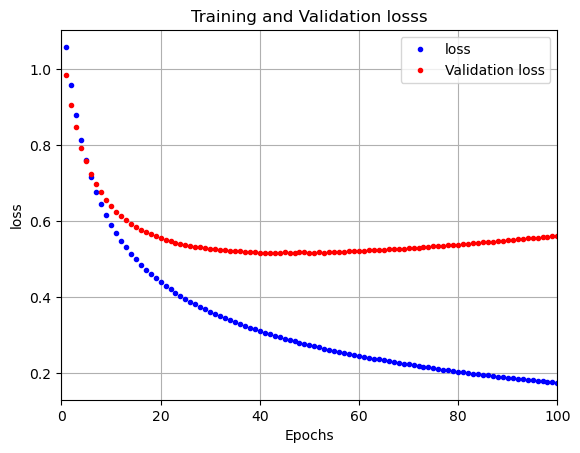

In [27]:
import matplotlib.pyplot as plt

def plot_training_history(history, monitor='loss'):
  loss, val_loss = history.history[monitor], history.history['val_' + monitor]
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'b.', label=monitor)
  plt.plot(epochs, val_loss, 'r.', label='Validation ' + monitor)
  plt.xlim([0, len(loss)])
  plt.title('Training and Validation ' + monitor + 's')
  plt.xlabel('Epochs')
  plt.ylabel(monitor)
  plt.legend()
  plt.grid()
  plt.show()

plot_training_history(baseline_history, monitor='loss')

The performance of the baseline model on the validation set, with an accuracy of 0.78, an F1 score of 0.72, and an AUC of 0.79, demonstrates that it significantly outperforms the naive baseline model (accuracy: 0.63, F1 score: 0.26, AUC: 0.50). This highlights the effectiveness of the baseline model in better capturing the sentiment distribution and providing more reliable classification results.

### 5. Scaling Up: Developing a Model that Overfits

#### More Complex Model
We build a model with one or two hidden layers and see if it can overfit the data. This model helps gauge the complexity required to learn the patterns in the data. By monitoring the training and validation loss, we can observe overfitting and decide on regularization techniques to mitigate it. Understanding the complexity required to fit the data is crucial for determining the appropriate model architecture and regularization techniques. This step helps us identify the point where the model becomes too complex and starts overfitting.

Validation Accuracy: 0.78, F1 Score: 0.73, AUC: 0.91


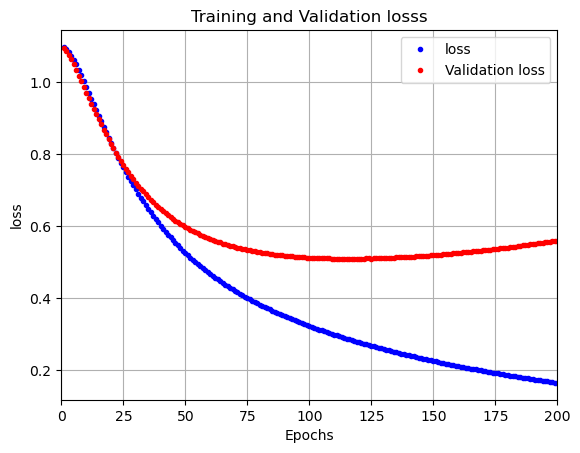

In [31]:
# Build overfitting model with one hidden layer
overfit = Sequential([
  Dense(64, activation="relu", input_shape=(X_train_tfidf.shape[1],)),
  Dense(OUTPUT_CLASSES, activation="softmax")
])

# Compile the overfitting model with updated learning rate
overfit.compile(optimizer=Adam(learning_rate=0.0001),
                loss=LOSS,
                metrics=METRICS)

# Train overfitting model
overfit_history = overfit.fit(X_train_tfidf, y_train, batch_size=BATCH_SIZE, epochs=200,
                              validation_split=0.1, verbose=0, class_weight=class_weight)

# Access validation accuracy and other metrics from history
overfit_val_accuracy = overfit_history.history['val_categorical_accuracy'][-1]
overfit_val_f1_score = overfit_history.history['val_f1_score'][-1]
overfit_val_auc = overfit_history.history['val_auc'][-1]

print(f'Validation Accuracy: {overfit_val_accuracy:.2f}, F1 Score: {overfit_val_f1_score:.2f}, AUC: {overfit_val_auc:.2f}')

plot_training_history(overfit_history, monitor='loss')

The more complex model achieved an accuracy of 0.78, an F1 score of 0.73, and an AUC of 0.91 on the validation set. With a learning rate of 0.0001, the training history plot shows that the model is overfitting as the validation loss starts to increase after around 110 epochs, while the training loss continues to decrease. This suggests that the model has learned the training data well but is not generalizing as effectively to the validation data. Regularization techniques will be necessary to mitigate this overfitting.

### 6. Regularizing Your Model and Tuning Your Hyperparameters

#### Regularization Techniques
We identified that the deeper model with hidden layers overfits the data. To address this, we incorporated regularization techniques. Dropout is added to reduce overfitting by randomly setting a fraction of input units to 0 at each update during training, which helps prevent the model from relying too much on any particular neurons. L2 regularization is used to add a penalty proportional to the squared value of the weights, discouraging the model from learning overly complex patterns.

#### Hyperparameter Tuning Using Cross-Validation
To find the optimal hyperparameters, we performed cross-validation on the following hyperparameters: dropout rate and L2 regularization factor.

In [34]:
from sklearn.model_selection import KFold
import itertools
from tensorflow.keras.models import clone_model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.regularizers import l2
import pickle

def cross_validation(X, y, cv, model, param_grid, loss, metrics, epochs, callbacks, class_weight, seed=0, force_recompute=False, results_file_path=None):
    """
    Perform cross-validation for hyperparameter tuning with class weights.

    Parameters:
    X : numpy.ndarray
        The feature matrix.
    y : numpy.ndarray
        The target labels.
    cv : int
        The number of folds for cross-validation.
    model : keras.Model
        The base model to be cloned and tuned.
    param_grid : dict
        The grid of hyperparameters to search.
    loss : str
        The loss function to compile the model.
    metrics : list
        The list of metrics to compile the model.
    epochs : int
        The number of epochs to train each model.
    callbacks : list
        The list of callbacks to use during training.
    class_weight : dict
        The class weights to apply during training.
    seed : int
        The random seed for reproducibility.
    force_recompute : bool
        If True, recompute all cross-validation even if results already exist.
    results_file_path : str
        Path to save or load cross-validation results.

    Returns:
    dict
        A dictionary with parameter combinations as keys and mean validation scores as values.
    """
    # Ensure results_file_path is specified
    if results_file_path is None:
        raise ValueError("results_file_path must be specified.")
    
    # Load existing cross-validation results if they exist and force_recompute is False
    if os.path.exists(results_file_path) and not force_recompute:
        with open(results_file_path, 'rb') as f:
            cvs = pickle.load(f)
    else:
        cvs = {}

    # Initialize KFold cross-validation with shuffling and a fixed random seed for reproducibility
    kf = KFold(n_splits=cv, shuffle=True, random_state=seed)
    
    # Extract hyperparameter names and their possible values
    keys, values = zip(*param_grid.items())
    
    # Iterate over all possible combinations of hyperparameters
    for params in [dict(zip(keys, v)) for v in itertools.product(*values)]:
        params_str = str(params)
        if params_str in cvs and not force_recompute:
            continue  # Skip if already done and force_recompute is False

        scores = []
        
        # Perform K-fold cross-validation
        for train_index, val_index in kf.split(X):
            # Clone the base model to ensure each fold starts with the same architecture and weights
            nn = clone_model(model)
            
            # Update the dropout rate and L2 regularization factor based on the current hyperparameter combination
            for layer in nn.layers:
                if isinstance(layer, Dropout):
                    layer.rate = params['dropout']
                if isinstance(layer, Dense):
                    if layer.activation.__name__ != 'softmax':  # Avoid modifying the output layer
                        layer.kernel_regularizer = l2(params['alpha'])
            
            # Compile the cloned model with the specified optimizer, loss function, and metrics
            nn.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                       loss=loss, metrics=metrics)
            
            # Train the model on the training split for the current fold with class weights
            nn.fit(X[train_index], y[train_index],
                   batch_size=params['batch_size'], epochs=epochs,
                   validation_data=(X[val_index], y[val_index]),
                   callbacks=callbacks, verbose=0, class_weight=class_weight)
            
            # Evaluate the model on the validation split for the current fold and store the validation score
            scores.append(nn.evaluate(X[val_index], y[val_index], verbose=0)[1:])
            
            # Delete the model to free up memory
            del nn
        
        # Calculate the mean validation score for the current hyperparameter combination
        cvs[params_str] = np.array(scores).mean(axis=0)

        # Save the updated cross-validation results to the specified file path
        with open(results_file_path, 'wb') as f:
            pickle.dump(cvs, f)
    
    return cvs

In [192]:
# Define hyperparameter grid
param_grid = {
    'dropout': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'learning_rate': [0.001],
    'batch_size': [512]
}

In [130]:
# Define model and hyperparameters
model = Sequential([
    Dense(64, kernel_regularizer=l2(0.01), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(OUTPUT_CLASSES, activation='softmax')
])

In [132]:
# Path to save cross-validation results
results_file_path = os.path.join(base_path, "regularized_results.pkl")

# Perform cross-validation
cv_scores = cross_validation(X_train_tfidf, y_train, cv=3, model=model, param_grid=param_grid,
                             loss=LOSS, metrics=METRICS, epochs=200, callbacks=[], seed=42, 
                             force_recompute=True, results_file_path=results_file_path, class_weight=class_weight)

# Find best parameters
best_params = max(cv_scores, key=lambda k: cv_scores[k][2])
regularized_best_score = cv_scores[best_params]

# Load best_params string into Python dictionary
regularized_best_params = eval(best_params)

print(f'Best params: {regularized_best_params}, Best score: {regularized_best_score}')

Best params: {'dropout': 0.9, 'alpha': 0.001, 'learning_rate': 0.001, 'batch_size': 512}, Best score: [0.78133539 0.73073628 0.90382431]


Based on the cross-validation results, the best parameters were found to be a dropout rate of 0.9 and an L2 regularization factor of 0.001.

Using the best hyperparameters, we retrained the regularized model:

Test Accuracy: 0.79, F1 Score: 0.74, AUC: 0.90


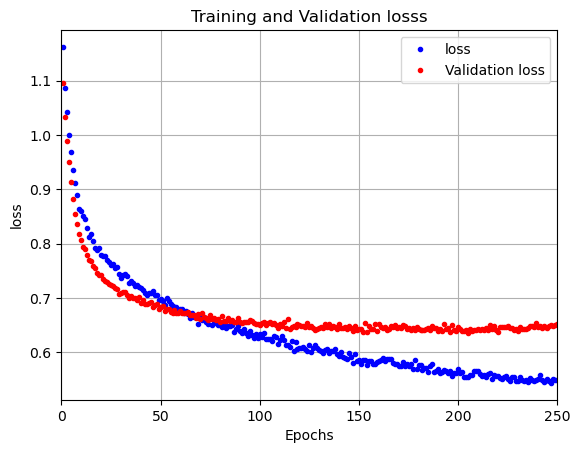

In [139]:
# Build regularized model with optimal hyperparameters
regularized_model = Sequential([
    Dense(64, kernel_regularizer=l2(regularized_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_best_params['dropout']),
    Dense(OUTPUT_CLASSES, activation='softmax')
])

# Compile the regularized model
regularized_model.compile(optimizer=Adam(learning_rate=regularized_best_params['learning_rate']),
                          loss=LOSS,
                          metrics=METRICS)

# Train the regularized model
regularized_history = regularized_model.fit(X_train_tfidf, y_train, batch_size=regularized_best_params['batch_size'], epochs=250,
                                            validation_split=0.1, callbacks=[], verbose=0, class_weight=class_weight)

# Evaluate the regularized model
regularized_scores = regularized_model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Regularized Model - Test Accuracy: {regularized_scores[1]:.2f}, F1 Score: {regularized_scores[2]:.2f}, AUC: {regularized_scores[3]:.2f}')

# Plot regularized model training history
plot_training_history(regularized_history, monitor='loss')

The regularized model achieved an accuracy of 0.79, an F1 score of 0.74, and an AUC of 0.90 on the test set. The training history plot shows that the validation loss stabilizes and does not increase significantly, indicating that the regularization techniques effectively mitigated overfitting.

### 7. Exploring Different Neural Network Architectures

To further explore and optimize the model, we experimented with different architectures:

- **Wider models:** These have more units in the hidden layers, allowing them to capture more complex patterns in the data.
- **Deeper models:** These include additional hidden layers, enabling the model to learn hierarchical representations of the data.
- **Narrower models:** These have fewer units in the hidden layers, promoting simplicity and reducing the risk of overfitting.

In [142]:
# Build different models for comparison
# Wider model with more units in the hidden layer
wider = Sequential([
    Dense(128, kernel_regularizer=l2(0.01), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(OUTPUT_CLASSES, activation='softmax')
])

# Deeper model with two hidden layers
deeper = Sequential([
    Dense(64, kernel_regularizer=l2(0.01), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, kernel_regularizer=l2(0.01), activation='relu'),
    Dropout(0.5),
    Dense(OUTPUT_CLASSES, activation='softmax')
])

# Narrower model with fewer units in the hidden layer
narrower = Sequential([
    Dense(32, kernel_regularizer=l2(0.01), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(OUTPUT_CLASSES, activation='softmax')
])

#### Training and Evaluating Different Architectures:

We trained the various model architectures defined above, including wider, deeper, and narrower models, to explore their performance.

In [170]:
# Path to save cross-validation results
results_file_path = os.path.join(base_path, "wider_results.pkl")

# Perform cross-validation to find the best hyperparameters for the current model
cv_scores = cross_validation(X_train_tfidf, y_train, cv=3, model=wider, param_grid=param_grid,
                             loss=LOSS, metrics=METRICS, epochs=200, callbacks=[], seed=42, 
                             force_recompute=False, results_file_path=results_file_path, class_weight=class_weight)

# Find best parameters
best_params = max(cv_scores, key=lambda k: cv_scores[k][2])
wider_best_score = cv_scores[best_params]

wider_best_params = eval(best_params)  # Convert string representation back to dictionary

print(f'Wider Model - Best params: {wider_best_params}, Best score: {wider_best_score}')

Wider Model - Best params: {'dropout': 0.9, 'alpha': 0.01, 'learning_rate': 0.001, 'batch_size': 512}, Best score: [0.78048156 0.730929   0.90599489]


Wider Model - Test Accuracy: 0.79, F1 Score: 0.74, AUC: 0.90


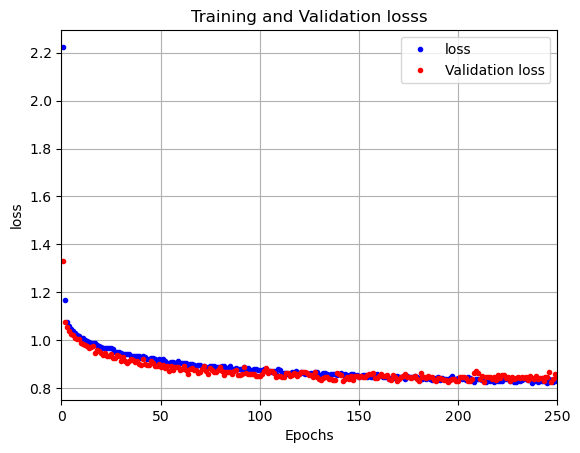

In [174]:
# Build regularized model with optimal hyperparameters
wider_model = Sequential([
    Dense(128, kernel_regularizer=l2(wider_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(wider_best_params['dropout']),
    Dense(OUTPUT_CLASSES, activation='softmax')
])

# Compile the regularized model
wider_model.compile(optimizer=Adam(learning_rate=wider_best_params['learning_rate']),
               loss='categorical_crossentropy',
               metrics=['categorical_accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])


# Train the regularized model
wider_history = wider_model.fit(X_train_tfidf, y_train, batch_size=wider_best_params['batch_size'], epochs=250,
                                validation_split=0.1, callbacks=[], verbose=0, class_weight=class_weight)

# Evaluate the wider model
wider_scores = wider_model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Wider Model - Test Accuracy: {wider_scores[1]:.2f}, F1 Score: {wider_scores[2]:.2f}, AUC: {wider_scores[3]:.2f}')

# Plot wider model training history
plot_training_history(wider_history, monitor='loss')

In [194]:
# Path to save cross-validation results
results_file_path = os.path.join(base_path, "deeper_results.pkl")

# Perform cross-validation to find the best hyperparameters for the current model
cv_scores = cross_validation(X_train_tfidf, y_train, cv=3, model=deeper, param_grid=param_grid,
                             loss=LOSS, metrics=METRICS, epochs=200, callbacks=[], seed=42, 
                             force_recompute=True, results_file_path=results_file_path, class_weight=class_weight)

# Find best parameters
best_params = max(cv_scores, key=lambda k: cv_scores[k][2])
deeper_best_score = cv_scores[best_params]

deeper_best_params = eval(best_params)  # Convert string representation back to dictionary

print(f'Deeper Model - Best params: {deeper_best_params}, Best score: {deeper_best_score}')

Deeper Model - Best params: {'dropout': 0.9, 'alpha': 0.001, 'learning_rate': 0.001, 'batch_size': 512}, Best score: [0.75614754 0.70847545 0.88369173]


Deeper Model - Test Accuracy: 0.79, F1 Score: 0.74, AUC: 0.89


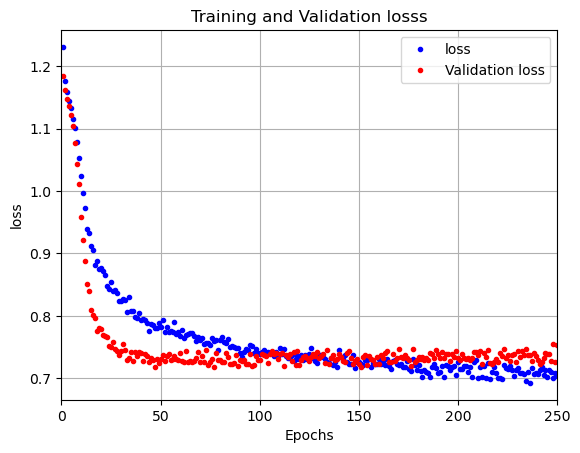

In [196]:
# Build regularized model with optimal hyperparameters
deeper_model = Sequential([
    Dense(64, kernel_regularizer=l2(deeper_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(deeper_best_params['dropout']),
    Dense(64, kernel_regularizer=l2(deeper_best_params['alpha']), activation='relu'),
    Dropout(deeper_best_params['dropout']),
    Dense(OUTPUT_CLASSES, activation='softmax')
])

# Compile the regularized model
deeper_model.compile(optimizer=Adam(learning_rate=deeper_best_params['learning_rate']), loss=LOSS, metrics=METRICS)

# Train the regularized model
deeper_history = deeper_model.fit(X_train_tfidf, y_train, batch_size=deeper_best_params['batch_size'], epochs=250,
                                  validation_split=0.1, callbacks=[], verbose=0, class_weight=class_weight)

# Evaluate the wider model
deeper_scores = deeper_model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Deeper Model - Test Accuracy: {deeper_scores[1]:.2f}, F1 Score: {deeper_scores[2]:.2f}, AUC: {deeper_scores[3]:.2f}')

# Plot deeper model training history
plot_training_history(deeper_history, monitor='loss')

In [212]:
# Path to save cross-validation results
results_file_path = os.path.join(base_path, "narrower_results.pkl")

# Perform cross-validation to find the best hyperparameters for the current model
cv_scores = cross_validation(X_train_tfidf, y_train, cv=3, model=narrower, param_grid=param_grid,
                             loss=LOSS, metrics=METRICS, epochs=350, callbacks=[], seed=42, 
                             force_recompute=True, results_file_path=results_file_path, class_weight=class_weight)

# Find best parameters
best_params = max(cv_scores, key=lambda k: cv_scores[k][2])
narrower_best_score = cv_scores[best_params]

narrower_best_params = eval(best_params)  # Convert string representation back to dictionary

print(f'Narrower Model - Best params: {narrower_best_params}, Best score: {narrower_best_score}')

Narrower Model - Best params: {'dropout': 0.9, 'alpha': 0.001, 'learning_rate': 0.001, 'batch_size': 512}, Best score: [0.7837261  0.73181921 0.90099301]


Narrower Model - Test Accuracy: 0.79, F1 Score: 0.74, AUC: 0.90


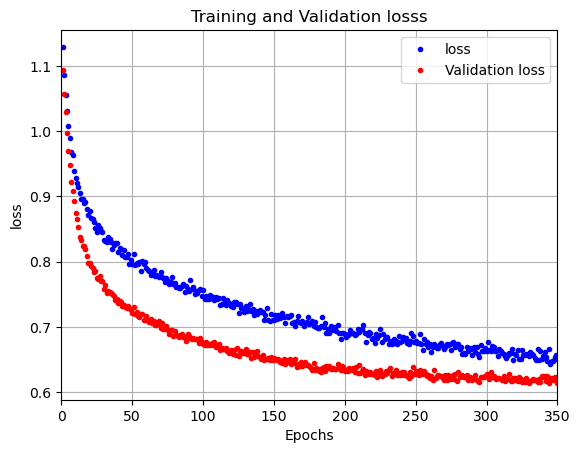

In [213]:
# Build regularized model with optimal hyperparameters
narrower_model = Sequential([
    Dense(32, kernel_regularizer=l2(narrower_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(narrower_best_params['dropout']),
    Dense(OUTPUT_CLASSES, activation='softmax')
])

# Compile the regularized model
narrower_model.compile(optimizer=Adam(learning_rate=narrower_best_params['learning_rate']), loss=LOSS, metrics=METRICS)

# Train the regularized model
narrower_history = narrower_model.fit(X_train_tfidf, y_train, batch_size=narrower_best_params['batch_size'], epochs=350,
                                      validation_split=0.1, callbacks=[], verbose=0, class_weight=class_weight)

# Evaluate the narrower model
narrower_scores = narrower_model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Narrower Model - Test Accuracy: {narrower_scores[1]:.2f}, F1 Score: {narrower_scores[2]:.2f}, AUC: {narrower_scores[3]:.2f}')

# Plot narrower model training history
plot_training_history(narrower_history, monitor='loss')

#### Models Performance Comparison Table:

The summary table below shows the performance metrics of different models, including the baseline model and variations such as regularized, wider, deeper, and narrower models. The table presents the accuracy, F1 Score, AUC, and the hyperparameters (Dropout rate and L2 regularization alpha value) used for each model.

In [228]:
import pandas as pd

# Extracting the performance metrics and hyperparameters
models_performance = {
    "Model": ["Baseline", "Regularized", "Wider", "Deeper", "Narrower"],
    "Accuracy": [baseline_scores[1], regularized_scores[1], wider_scores[1], deeper_scores[1], narrower_scores[1]],
    "F1 Score": [baseline_scores[2], regularized_scores[2], wider_scores[2], deeper_scores[2], narrower_scores[2]],
    "AUC": [baseline_scores[3], regularized_scores[3], wider_scores[3], deeper_scores[3], narrower_scores[3]],
    "Dropout": [np.nan, regularized_best_params['dropout'], wider_best_params['dropout'], deeper_best_params['dropout'], narrower_best_params['dropout']],
    "Alpha": [np.nan, regularized_best_params['alpha'], wider_best_params['alpha'], deeper_best_params['alpha'], narrower_best_params['alpha']],
}

# Creating a DataFrame for the performance comparison table
models_performance_df = pd.DataFrame(models_performance)
print(models_performance_df)


         Model  Accuracy  F1 Score       AUC  Dropout  Alpha
0     Baseline  0.785861  0.727001  0.893379      NaN    NaN
1  Regularized  0.793716  0.740946  0.903457      0.9  0.001
2        Wider  0.786544  0.737991  0.904836      0.9  0.010
3       Deeper  0.787227  0.736643  0.893797      0.9  0.001
4     Narrower  0.790984  0.740127  0.898557      0.9  0.001


## Analysis of Results

The performance of various neural network models, including the baseline model and variations such as regularized, wider, deeper, and narrower models, is summarized in the results table. The key metrics—accuracy, F1 Score, and AUC—along with the hyperparameters (Dropout rate and L2 regularization alpha value) used for each model, provide a comprehensive overview of model performance.

**Baseline Model:**
- The baseline model achieves an accuracy of 0.786, an F1 Score of 0.727, and an AUC of 0.893. 
- The training history for the baseline model indicates that it has sufficient statistical power to fit the training data, as shown by the steady decrease in training loss. However, the increase in validation loss after around 20 epochs suggests that the model begins to overfit the data, memorizing patterns specific to the training set that do not generalize well to unseen data.

**Regularized Model:**
- The regularized model shows slight improvements over the baseline in all metrics: accuracy (0.794), F1 Score (0.741), and AUC (0.903).
- The addition of regularization techniques, such as Dropout and L2 regularization, helps to reduce overfitting, as evidenced by the improved AUC, which measures the model's ability to distinguish between classes.

**Wider Model:**
- The wider model achieves the highest AUC of 0.905, indicating its strong ability to discriminate between classes. It also shows improvements in accuracy and F1 Score compared to the baseline.
- However, the gains from this architecture are marginal, suggesting that the baseline model already had enough capacity to capture the complexity of the data, and increasing the number of units in the hidden layers did not significantly enhance performance.

**Deeper and Narrower Models:**
- Both the deeper and narrower models exhibit performances close to the baseline, with only minor variations in accuracy, F1 Score, and AUC.
- The results indicate that adding more layers or reducing the number of units does not substantially improve the model's performance. This is likely because the baseline model already possesses enough statistical power to learn from the data effectively.

**Overall Analysis:**
- The baseline model's ability to overfit the data, as shown by the training history plot, highlights its sufficient capacity to learn from the dataset. This capacity limits the extent to which additional complexity in the model architecture (e.g., wider or deeper models) can improve performance.
- Regularization plays a key role in enhancing the model's generalization capabilities, as seen in the regularized model's metrics. However, the improvements are marginal, suggesting that the baseline model is already near-optimal for this task within the constraints of the assignment.

## Conclusions

This study explored various dense neural network architectures for sentiment analysis on a dataset of tweets related to US airlines. The models were evaluated on key metrics such as accuracy, F1 Score, and AUC, with a particular focus on handling class imbalance and preventing overfitting.

The **baseline model** demonstrated strong performance, indicating that it already possessed sufficient statistical power to effectively classify the sentiment of tweets. The training history showed evidence of overfitting, with the validation loss increasing after several epochs, suggesting that the model began to memorize the training data rather than generalize from it.

Despite experimenting with **wider, deeper, and narrower architectures**, the improvements over the baseline model were marginal. This outcome suggests that the baseline model's architecture was already well-suited to the task, and increasing complexity did not significantly enhance performance. Regularization techniques, such as Dropout and L2 regularization, provided slight improvements by mitigating overfitting and improving the model's ability to generalize.

In conclusion, the study highlights that, within the constraints of using only Dense layers, Dropout, and L2 regularization, the baseline model was sufficient for achieving high performance in sentiment classification. The exploration of different architectures confirmed that sometimes simpler models can be just as effective, especially when they already possess the capacity to capture the essential patterns in the data. Regularization remains a valuable tool for enhancing model generalization, particularly in scenarios where overfitting is observed.

## Future Work
Future work could focus on enhancing model performance through the implementation of optimization techniques like Early Stopping and learning rate schedulers, which would prevent overfitting and improve training efficiency. Additionally, increasing the interpretability of the models using techniques such as LIME (Local Interpretable Model-agnostic Explanations) or SHAP (SHapley Additive exPlanations) would provide valuable insights into the decision-making process, making the models' predictions more transparent and reliable. These improvements would lead to more robust and trustworthy sentiment analysis models, better suited for real-world applications.

## References

**Chollet, F.** (2018). *Deep learning with Python.* Manning Publications.